## Black Friday Dataset EDA And Feature Engineering
Cleaning and preparing the data for model training

In [245]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
matplotlib.rcParams['figure.figsize'] = (12,6)
%matplotlib inline

In [11]:
#importing the train dataset
df_train = pd.read_csv('train.csv')
df_train.shape

(550068, 12)

In [13]:
df_train.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [28]:
df_train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [15]:
## importing test dataset
df_test = pd.read_csv('test.csv')
df_test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [17]:
##Merge test and train dataset
df = pd.concat([df_train,df_test])
df.shape

(783667, 12)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          537685 non-null  float64
 10  Product_Category_3          237858 non-null  float64
 11  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 77.7+ MB


In [19]:
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
dtype: int64

<Axes: >

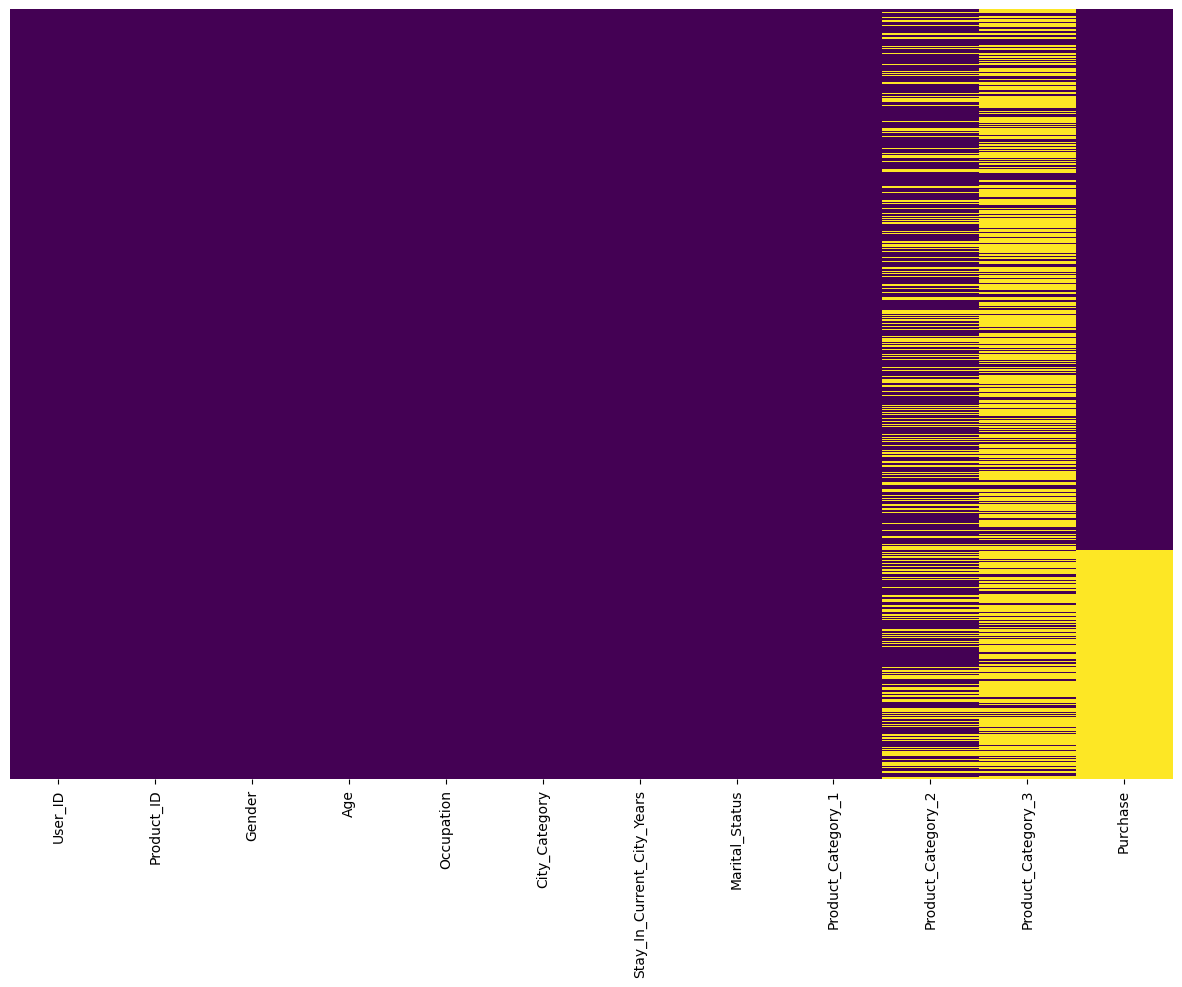

In [48]:
sns.heatmap(df.isnull(),yticklabels=False, cbar = False, cmap = 'viridis')

In [21]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,7.836670e+05,783667.000000,783667.000000,783667.000000,537685.000000,237858.000000,550068.000000
mean,1.003029e+06,8.079300,0.409777,5.366196,9.844506,12.668605,9263.968713
std,1.727267e+03,6.522206,0.491793,3.878160,5.089093,4.125510,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001519e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003075e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [23]:
df.drop(['User_ID'], axis = 'columns', inplace = True)

In [25]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


## Handling Categorical Features

In [27]:
df['Gender'] = df.Gender.apply(lambda x: 0 if x=='F' else 1)

In [29]:
df.head(10)

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,0,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,0,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,0,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,1,55+,16,C,4+,0,8,NaN,NaN,7969.0
5,P00193542,1,26-35,15,A,3,0,1,2.0,NaN,15227.0
6,P00184942,1,46-50,7,B,2,1,1,8.0,17.0,19215.0
7,P00346142,1,46-50,7,B,2,1,1,15.0,NaN,15854.0
8,P0097242,1,46-50,7,B,2,1,1,16.0,NaN,15686.0
9,P00274942,1,26-35,20,A,1,1,8,NaN,NaN,7871.0


## Handling Age Catecory

In [31]:
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [33]:
df['Age'] = df['Age'].map({"0-17":1,"18-25":2,"26-35" : 3, "36-45": 4, "46-50": 5, "51-55": 6, "55+" : 7 })

In [35]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,1,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,0,1,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,0,1,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,1,7,16,C,4+,0,8,NaN,NaN,7969.0


In [37]:
df.groupby(['City_Category']).size().reset_index()

,City_Category,0
0,A,210244
1,B,329739
2,C,243684


In [39]:
df['City_Category'].map({'A':1,'B':2,'C':3})

0         1
1         1
2         1
3         1
4         3
         ..
233594    2
233595    2
233596    2
233597    3
233598    2
Name: City_Category, Length: 783667, dtype: int64

In [41]:
df_city = pd.get_dummies(df['City_Category'], drop_first = True, dtype = int)
df_city.head()

,B,C
0,0,0
1,0,0
2,0,0
3,0,0
4,0,1


In [43]:
df = pd.concat([df,df_city], axis = 'columns')

In [45]:
df.drop(['City_Category'], axis = 1, inplace = True)
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,2,0,3,NaN,NaN,8370.0,0,0
1,P00248942,0,1,10,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,2,0,12,NaN,NaN,1422.0,0,0
3,P00085442,0,1,10,2,0,12,14.0,NaN,1057.0,0,0
4,P00285442,1,7,16,4+,0,8,NaN,NaN,7969.0,0,1


In [47]:
df.Stay_In_Current_City_Years.unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  object 
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          537685 non-null  float64
 8   Product_Category_3          237858 non-null  float64
 9   Purchase                    550068 non-null  float64
 10  B                           783667 non-null  int32  
 11  C                           783667 non-null  int32  
dtypes: float64(3), int32(2), int64(5), object(2)
memory usage: 71.7+ MB


## Missing Values

In [51]:
df.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
B                                  0
C                                  0
dtype: int64

In [53]:
df1 = df.copy()

In [55]:
df1.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,2,0,3,NaN,NaN,8370.0,0,0
1,P00248942,0,1,10,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,2,0,12,NaN,NaN,1422.0,0,0
3,P00085442,0,1,10,2,0,12,14.0,NaN,1057.0,0,0
4,P00285442,1,7,16,4+,0,8,NaN,NaN,7969.0,0,1


In [57]:
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,2,0,3,NaN,NaN,8370.0,0,0
1,P00248942,0,1,10,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,2,0,12,NaN,NaN,1422.0,0,0
3,P00085442,0,1,10,2,0,12,14.0,NaN,1057.0,0,0
4,P00285442,1,7,16,4+,0,8,NaN,NaN,7969.0,0,1


In [59]:
df1['Age'] = df['Age']
df1.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,2,0,3,NaN,NaN,8370.0,0,0
1,P00248942,0,1,10,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,2,0,12,NaN,NaN,1422.0,0,0
3,P00085442,0,1,10,2,0,12,14.0,NaN,1057.0,0,0
4,P00285442,1,7,16,4+,0,8,NaN,NaN,7969.0,0,1


In [61]:
df = df1.copy()

In [63]:
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,2,0,3,NaN,NaN,8370.0,0,0
1,P00248942,0,1,10,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,2,0,12,NaN,NaN,1422.0,0,0
3,P00085442,0,1,10,2,0,12,14.0,NaN,1057.0,0,0
4,P00285442,1,7,16,4+,0,8,NaN,NaN,7969.0,0,1


In [160]:
df.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
B                                  0
C                                  0
dtype: int64

## Focus on replacing missing values

In [163]:
## in categorical and discrete missing values we want to replace with "mode"

In [173]:
## product category 2 filling missing values

In [65]:
df['Product_Category_2'] = df.Product_Category_2.fillna(df.Product_Category_2.mode()[0])

In [67]:
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,2,0,3,8.0,NaN,8370.0,0,0
1,P00248942,0,1,10,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,2,0,12,8.0,NaN,1422.0,0,0
3,P00085442,0,1,10,2,0,12,14.0,NaN,1057.0,0,0
4,P00285442,1,7,16,4+,0,8,8.0,NaN,7969.0,0,1


In [69]:
df['Product_Category_3'] = df['Product_Category_3'].fillna(df['Product_Category_3'].mode()[0])

In [71]:
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,2,0,3,8.0,16.0,8370.0,0,0
1,P00248942,0,1,10,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,2,0,12,8.0,16.0,1422.0,0,0
3,P00085442,0,1,10,2,0,12,14.0,16.0,1057.0,0,0
4,P00285442,1,7,16,4+,0,8,8.0,16.0,7969.0,0,1


In [185]:
## filling missing values for Product_Category_3

In [73]:
df['Product_Category_3'].mode()[0]

16.0

In [75]:
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].str.replace('+','')

In [77]:
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,2,0,3,8.0,16.0,8370.0,0,0
1,P00248942,0,1,10,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,2,0,12,8.0,16.0,1422.0,0,0
3,P00085442,0,1,10,2,0,12,14.0,16.0,1057.0,0,0
4,P00285442,1,7,16,4,0,8,8.0,16.0,7969.0,0,1


In [197]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  object 
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          783667 non-null  float64
 8   Product_Category_3          783667 non-null  float64
 9   Purchase                    550068 non-null  float64
 10  B                           783667 non-null  int32  
 11  C                           783667 non-null  int32  
dtypes: float64(3), int32(2), int64(5), object(2)
memory usage: 71.7+ MB


In [79]:
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].astype(int)

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  int32  
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          783667 non-null  float64
 8   Product_Category_3          783667 non-null  float64
 9   Purchase                    550068 non-null  float64
 10  B                           783667 non-null  int32  
 11  C                           783667 non-null  int32  
dtypes: float64(3), int32(3), int64(5), object(1)
memory usage: 68.8+ MB


In [203]:
df['B'] = df['B'].astype(int)
df['C'] = df['C'].astype(int)

In [205]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  int32  
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          783667 non-null  float64
 8   Product_Category_3          783667 non-null  float64
 9   Purchase                    550068 non-null  float64
 10  B                           783667 non-null  int32  
 11  C                           783667 non-null  int32  
dtypes: float64(3), int32(3), int64(5), object(1)
memory usage: 68.8+ MB


In [87]:
## Age vs Purshase 

<Axes: xlabel='Age', ylabel='Purchase'>

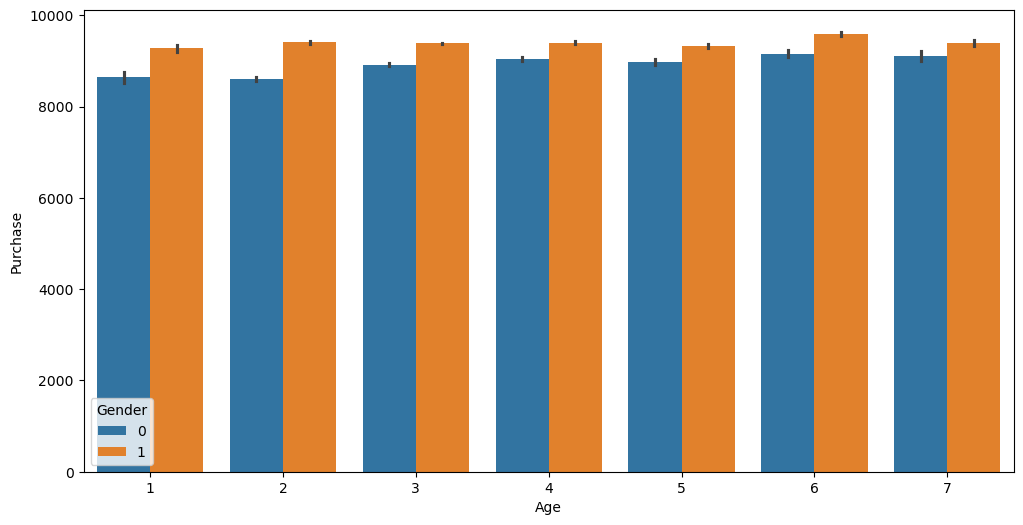

In [247]:
sns.barplot(x='Age', y = 'Purchase', data = df, hue = 'Gender')

## Purchasing of men is higher then women

In [90]:
## Purchase with occupation


<Axes: xlabel='Occupation', ylabel='Purchase'>

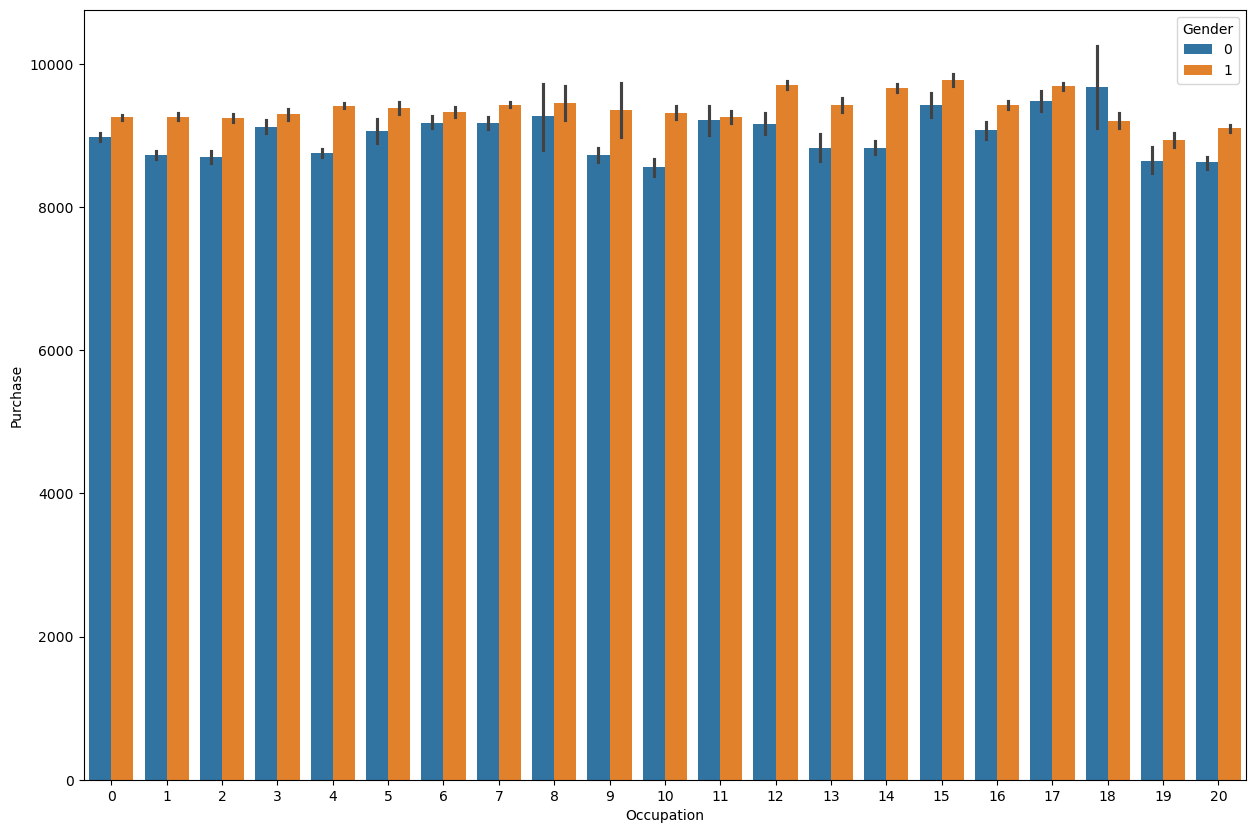

In [92]:
sns.barplot(x='Occupation', y = 'Purchase', data = df, hue = 'Gender')

<Axes: xlabel='Product_Category_1', ylabel='Purchase'>

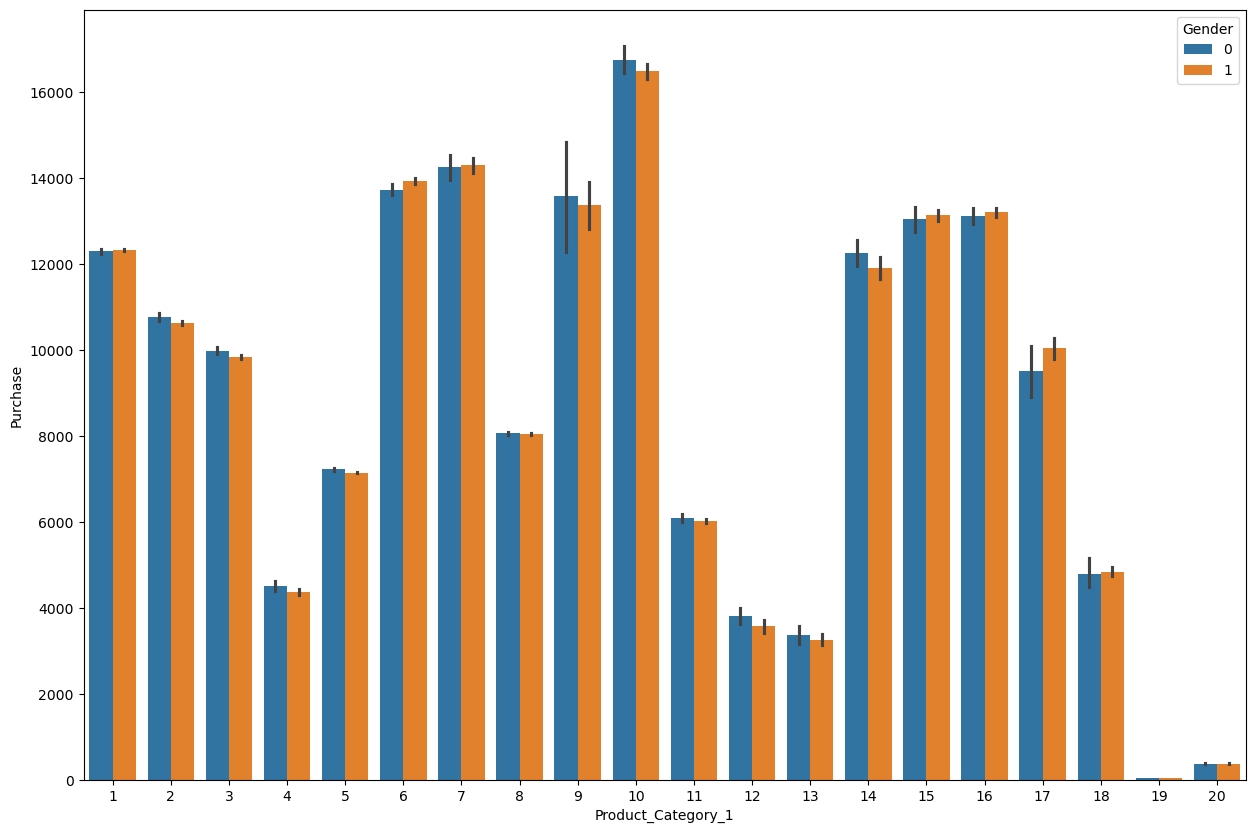

In [104]:
sns.barplot(x='Product_Category_1', y = 'Purchase', data = df, hue = 'Gender')

<Axes: xlabel='Product_Category_2', ylabel='Purchase'>

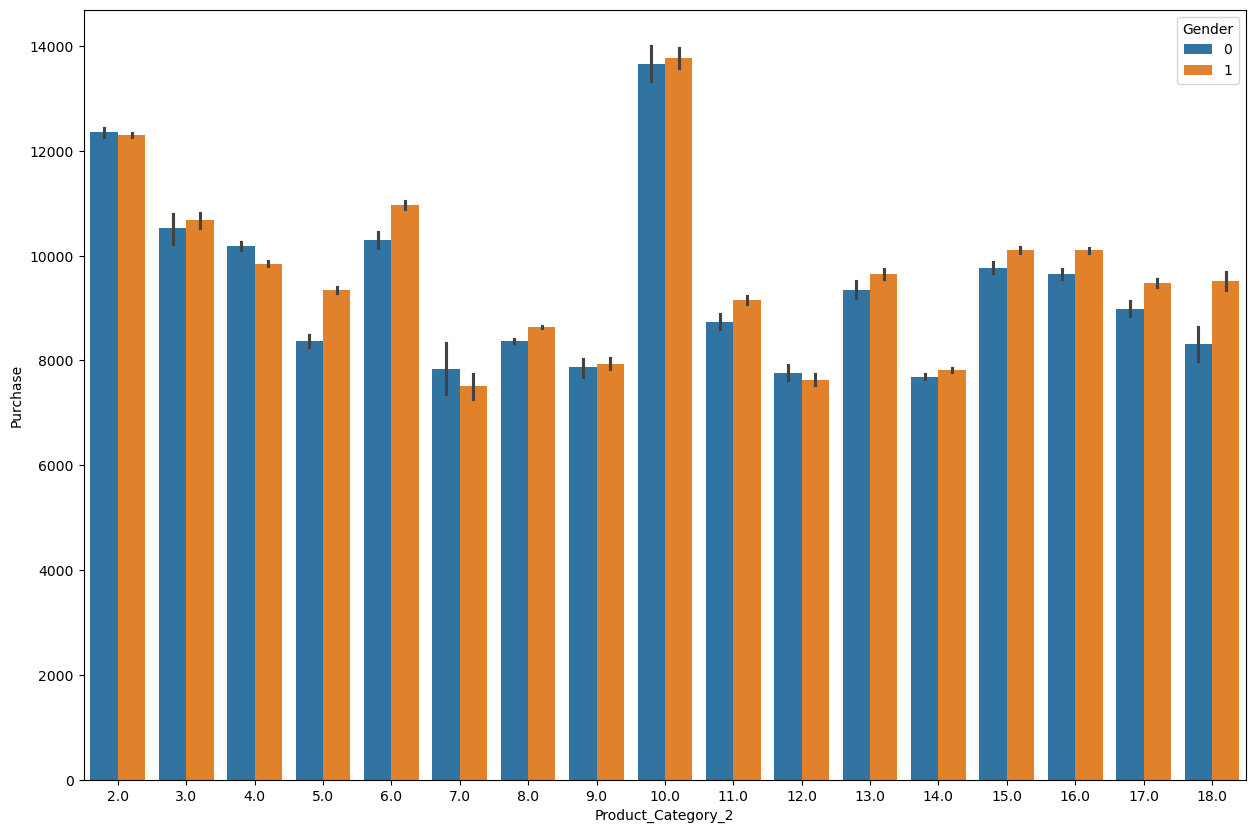

In [106]:
sns.barplot(x='Product_Category_2', y = 'Purchase', data = df, hue = 'Gender')

<Axes: xlabel='Product_Category_3', ylabel='Purchase'>

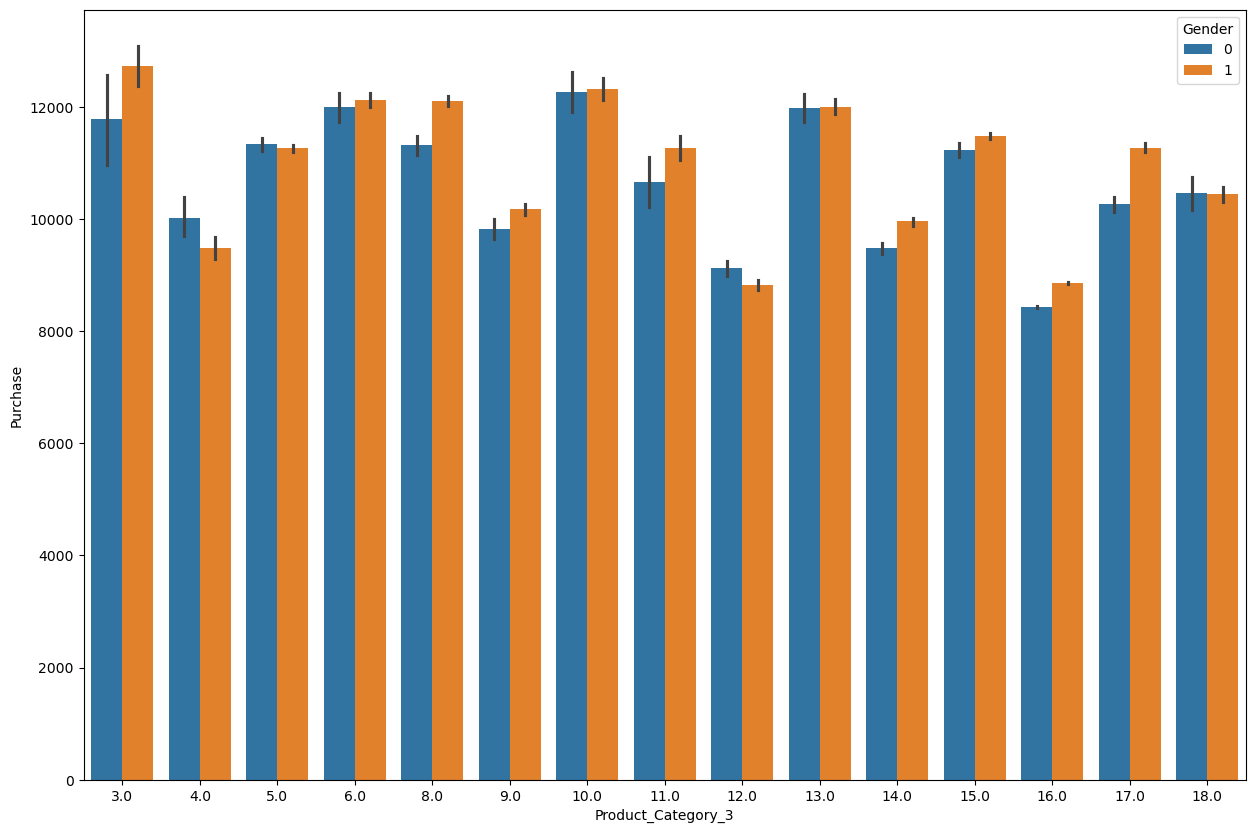

In [108]:
sns.barplot(x='Product_Category_3', y = 'Purchase', data = df, hue = 'Gender')

In [118]:
df_train = df[~df['Purchase'].isnull()]
df_train

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,2,0,3,8.0,16.0,8370.0,0,0
1,P00248942,0,1,10,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,2,0,12,8.0,16.0,1422.0,0,0
3,P00085442,0,1,10,2,0,12,14.0,16.0,1057.0,0,0
4,P00285442,1,7,16,4,0,8,8.0,16.0,7969.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,P00372445,1,6,13,1,1,20,8.0,16.0,368.0,1,0
550064,P00375436,0,3,1,3,0,20,8.0,16.0,371.0,0,1
550065,P00375436,0,3,15,4,1,20,8.0,16.0,137.0,1,0
550066,P00375436,0,7,1,2,0,20,8.0,16.0,365.0,0,1


In [120]:
df_test = df[df.Purchase.isnull()]

In [122]:
x = df_train.drop('Purchase', axis = 1)

In [124]:
y = df_train['Purchase']

In [126]:
from sklearn.model_selection import train_test_split

In [207]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size = 0.3, random_state = 10)

## Scaling feature

In [131]:
from sklearn.preprocessing import StandardScaler

In [133]:
ss = StandardScaler()

In [219]:
X_test.drop('Product_ID', axis = 1,inplace = True)

In [221]:
X_train_sc = ss.fit_transform(X_train)

In [223]:
X_test_sc = ss.transform(X_test)

<Axes: xlabel='Age', ylabel='Purchase'>

D:\anaconda3\Lib\site-packages\IPython\core\events.py:82: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
D:\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


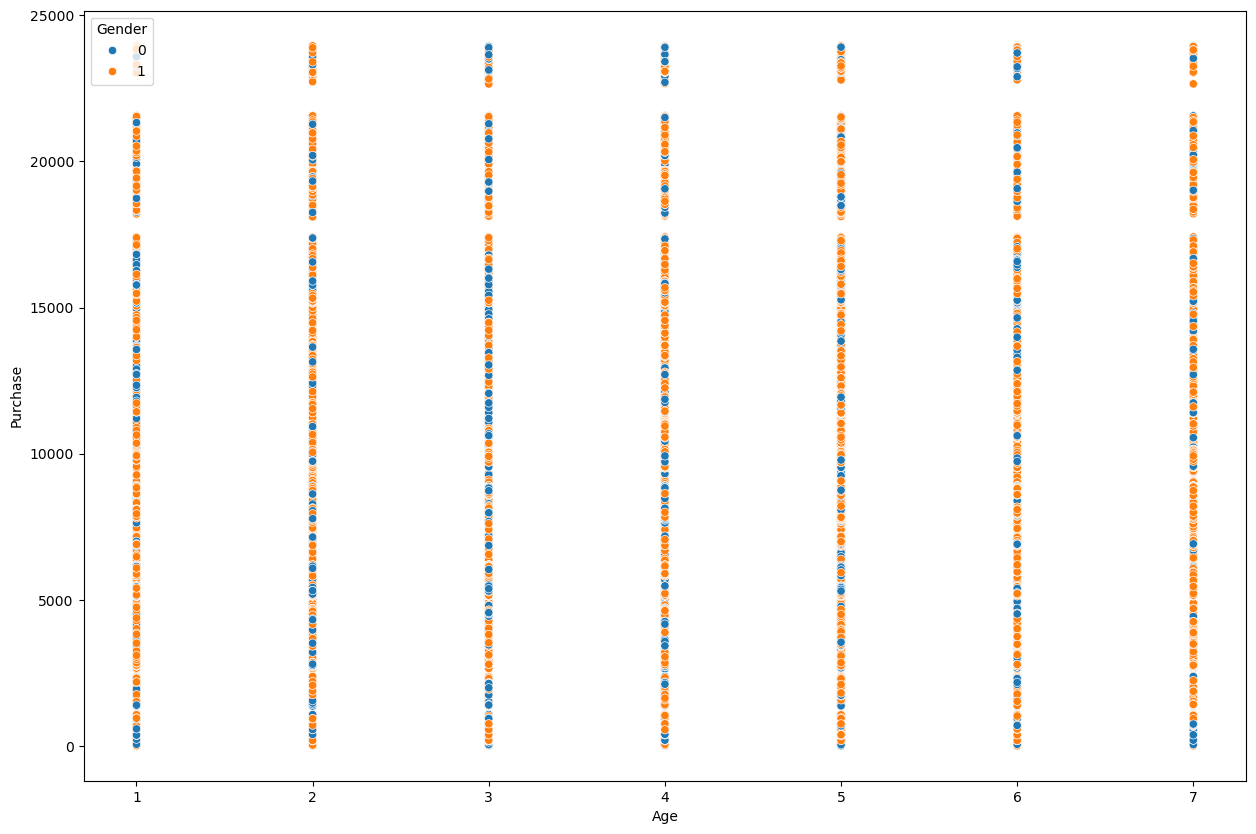

In [145]:
sns.scatterplot(x = 'Age', y = 'Purchase', hue = 'Gender', data = df)

In [147]:
from sklearn.ensemble import RandomForestClassifier

In [149]:
rc = RandomForestClassifier()

In [151]:
rc.fit(X_train,y_train)

MemoryError: could not allocate 18222153728 bytes

In [155]:
from sklearn.linear_model import LogisticRegression

In [157]:
lr = LogisticRegression()

In [181]:
X_train

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,B,C
154927,1,2,17,3,1,5,8.0,16.0,1,0
290402,1,7,1,0,1,8,8.0,16.0,1,0
543367,1,3,0,3,1,1,2.0,13.0,0,1
417786,1,4,16,0,0,1,5.0,17.0,0,0
537922,1,3,4,3,0,1,15.0,16.0,0,1
...,...,...,...,...,...,...,...,...,...,...
299741,1,3,3,3,0,3,4.0,16.0,0,1
533660,1,3,0,4,0,5,8.0,16.0,1,0
105595,1,4,7,2,0,3,5.0,16.0,1,0
443712,0,5,1,4,1,8,8.0,16.0,1,0


In [183]:
y_train.drop()

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,B,C
154927,1,2,17,3,1,5,8.0,16.0,1,0
290402,1,7,1,0,1,8,8.0,16.0,1,0
543367,1,3,0,3,1,1,2.0,13.0,0,1
417786,1,4,16,0,0,1,5.0,17.0,0,0
537922,1,3,4,3,0,1,15.0,16.0,0,1
...,...,...,...,...,...,...,...,...,...,...
299741,1,3,3,3,0,3,4.0,16.0,0,1
533660,1,3,0,4,0,5,8.0,16.0,1,0
105595,1,4,7,2,0,3,5.0,16.0,1,0
443712,0,5,1,4,1,8,8.0,16.0,1,0


In [185]:
lr.fit(X_train,y_train)

MemoryError: Unable to allocate 49.9 GiB for an array with shape (385047, 17378) and data type float64

In [165]:
X_train.shape

(385047, 10)

In [167]:
y_train.shape

(385047,)

In [195]:
from sklearn.decomposition import PCA


pca = PCA(n_components=10)  
X_train_reduced = pca.fit_transform(X_train.drop('Product_ID',axis = 1))
X_test_reduced = pca.transform(X_test.drop('Product_ID',axis = 1))

lr.fit(X_train_reduced, y_train)


MemoryError: Unable to allocate 49.9 GiB for an array with shape (385047, 17378) and data type float64

In [197]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier()
for batch in get_data_in_batches(X_train.drop('Product_ID',axis = 1), y_train):  # Define your function to yield data in batches
    X_batch, y_batch = batch
    sgd_clf.partial_fit(X_batch, y_batch, classes=np.unique(y_train))


NameError: name 'get_data_in_batches' is not defined

In [227]:
from sklearn.decomposition import PCA


pca = PCA(n_components=10)  # Adjust the number of components based on memory constraints
X_train_reduced = pca.fit_transform(X_train_sc)
X_test_reduced = pca.transform(X_test_sc)


In [229]:
from scipy.sparse import csr_matrix

X_train_sparse = csr_matrix(X_train_reduced)
X_test_sparse = csr_matrix(X_test_reduced)


In [243]:
from sklearn.metrics import mean_squared_error, r2_score
sgd_regressor = SGDRegressor(max_iter=1000, tol=1e-3)


def get_data_in_batches(X, y, batch_size=10000):
    for start in range(0, X.shape[0], batch_size):
        end = min(start + batch_size, X.shape[0])
        yield X[start:end], y[start:end]


for X_batch, y_batch in get_data_in_batches(X_train_sparse, y_train):
    sgd_regressor.partial_fit(X_batch, y_batch)

y_pred = sgd_regressor.predict(X_test_sparse)


mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


r2 = r2_score(y_test, y_pred)
print(f'R^2 Score: {r2}')

Mean Squared Error: 23353185.22432313
R^2 Score: 0.07393470222819731


In [233]:
from sklearn.metrics import mean_squared_error

y_pred = sgd_regressor.predict(X_test_sparse)

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 23376156.081966694
